# Distribution du potentiel électrostatique autour d'une surface chargée

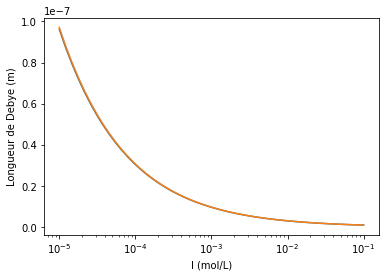

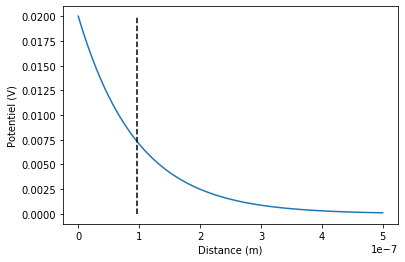

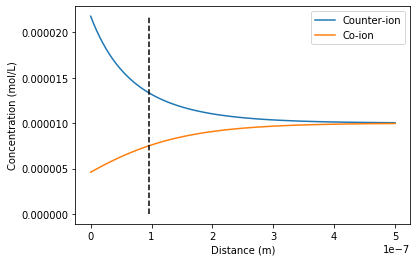

In [44]:
#détermination de la concentration critique de coagulation
#calcul de la stabilité par intégration du profil d'interaction

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

k=1.38064852e-23 #m2 kg s-2 K-1
T=298
avo=6.02214076e23
kT=k*T
e=1.6e-19
#permittivite electrique
eps0=8.85e-12 #C2 N-1 m-2
epsr=78.3
eps=eps0*epsr
#solution 
z=1. #electrolyte symetrique
#surface
potelec0=20.e-3 #V

#Calcul et tracé longueur de Debye en fonction de la force ionique
logc=np.linspace(-5,-1,50)
c=10.**logc #mol/L
I=z**2*c
lamD=np.sqrt(eps*k*T/(2*e*e*z**2*c*1e3*avo))
lamD_approx=3.07e-10/np.sqrt(I)

plt.semilogx(I,lamD)
plt.semilogx(I,lamD_approx, '-')
plt.xlabel('I (mol/L)')
plt.ylabel('Longueur de Debye (m)')    
plt.show()

#Calcul et tracé potentiel 
c0=10.**-5 #mol/L
I=z**2*c0
lamD0=np.sqrt(eps*k*T/(2*e*e*z**2*c0*1e3*avo))

x=np.linspace(0,5e-7,100)
potelec_approx=potelec0*np.exp(-x/lamD0)

plt.plot(x,potelec_approx)
plt.plot([lamD0,lamD0],[0,potelec0],'k--')
plt.xlabel('Distance (m)')
plt.ylabel('Potentiel (V)')    
plt.show()

#Calcul et tracé concentration
c_count=c0*np.exp(+z*e*potelec_approx/kT)
c_co=c0*np.exp(-z*e*potelec_approx/kT)

plt.plot(x,c_count,label='Counter-ion')
plt.plot(x,c_co,label='Co-ion')
plt.plot([lamD0,lamD0],[0,max(c_count)],'k--')
plt.xlabel('Distance (m)')
plt.ylabel('Concentration (mol/L)') 
plt.legend(loc='best')
plt.show()


